In [1]:
import streamlit as st
from segment_anything import sam_model_registry, SamPredictor,SamAutomaticMaskGenerator
import cv2
import supervision as sv
import matplotlib.pyplot as plt
import numpy as np
import torch

In [53]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [55]:
image = cv2.imread("./chienchat2.jpeg",cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

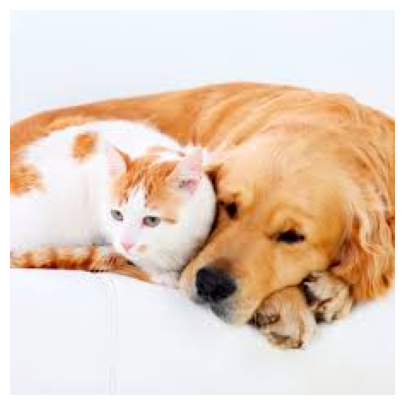

In [56]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show() 

In [61]:
# sam_checkpoint = "./sam_vit_b_01ec64.pth"
sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"
torch.cuda.empty_cache()
device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)


In [62]:
masks = mask_generator.generate(image)

In [63]:
masks[0]["segmentation"]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

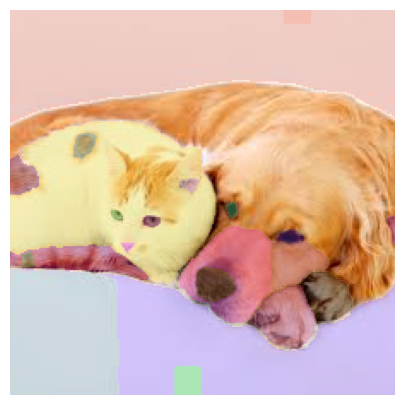

In [64]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 